In [190]:
# กิตติภัค วิบูลเสถียร 6310505688
# Kittipak Wibulsthien 6310505688
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## **1. Importing Dataset**

In [191]:
df = pd.read_excel("Cereals_Dataset_63_1.xls")

In [192]:
df.head(5)

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating,Unnamed: 12,Unnamed: 13
0,100%_Bran,70,4,1,130,10.0,5.0,6,280.0,25,3,68.402973,NaN,1. 1st column : Name of cereal
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8,135.0,0,3,33.983679,NaN,2. calories: calories per serving
2,All-Bran,70,4,1,260,9.0,7.0,5,320.0,25,3,59.425505,NaN,3. protein: grams of protein
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0,330.0,25,3,93.704912,NaN,4. fat: grams of fat
4,Almond_Delight,110,2,2,200,1.0,14.0,8,NaN,25,3,34.384843,NaN,5. sodium: milligrams of sodium


In [193]:
df.tail(5)

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating,Unnamed: 12,Unnamed: 13
72,Triples,110,2,1,250,0.0,21.0,3,60.0,25,3,39.106174,NaN,NaN
73,Trix,110,1,1,140,0.0,13.0,12,25.0,25,2,27.753301,NaN,NaN
74,Wheat_Chex,100,3,1,230,3.0,17.0,3,115.0,25,1,49.787445,NaN,NaN
75,Wheaties,100,3,1,200,3.0,17.0,3,110.0,25,1,51.592193,NaN,NaN
76,Wheaties_Honey_Gold,110,2,1,200,1.0,16.0,8,60.0,25,1,36.187559,NaN,NaN


## 2. Data-preprocessing: Remove all cereals with missing values, do normalization and appropriate attribute selection

In [194]:
df.shape

(77, 14)

In [195]:
df.drop(["Unnamed: 12", "Unnamed: 13"], axis='columns', inplace=True)

In [196]:
df.head(5)

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6,280.0,25,3,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8,135.0,0,3,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5,320.0,25,3,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0,330.0,25,3,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8,NaN,25,3,34.384843


In [197]:
df.describe(include="all")

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
count,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,75.000000,77.000000,77.000000,77.000000
unique,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,100%_Bran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,98.666667,28.246753,2.207792,42.665705
std,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,70.410636,22.342523,0.832524,14.047289
min,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,15.000000,0.000000,1.000000,18.042851
25%,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,33.174094
50%,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,40.400208
75%,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,50.828392


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cereals   77 non-null     object 
 1   calories  77 non-null     int64  
 2   protein   77 non-null     int64  
 3   fat       77 non-null     int64  
 4   sodium    77 non-null     int64  
 5   fiber     77 non-null     float64
 6   carbo     77 non-null     float64
 7   sugars    77 non-null     int64  
 8   potass    75 non-null     float64
 9   vitamins  77 non-null     int64  
 10  shelf     77 non-null     int64  
 11  rating    77 non-null     float64
dtypes: float64(4), int64(7), object(1)
memory usage: 7.3+ KB


In [199]:
# Extracting numerical and categorical features
Categorical_Columns = list(df.select_dtypes(include=['object']).columns)
print('Categorical Columns:\n {}'.format(Categorical_Columns))

Numerical_Columns = list(df.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical Columns:\n {}'.format(Numerical_Columns))

Categorical Columns:
 ['Cereals']
Numerical Columns:
 ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'rating']


In [200]:
# Checking Null values
print(df.isnull().any())
print("\n")
print(df.isnull().sum())

Cereals     False
calories    False
protein     False
fat         False
sodium      False
fiber       False
carbo       False
sugars      False
potass       True
vitamins    False
shelf       False
rating      False
dtype: bool


Cereals     0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      2
vitamins    0
shelf       0
rating      0
dtype: int64


In [201]:
# เนื่องจาก potass มีค่า NaN อยุ่ แต่มันมีจำนวนน้อย ผมจึงคิดว่าเราสามารถ drop มันไปได้ครับ
df.dropna(inplace = True)

In [202]:
df.shape

(75, 12)

In [203]:
# Checking Null values
print(df.isnull().any())
print("\n")
print(df.isnull().sum())

Cereals     False
calories    False
protein     False
fat         False
sodium      False
fiber       False
carbo       False
sugars      False
potass      False
vitamins    False
shelf       False
rating      False
dtype: bool


Cereals     0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
rating      0
dtype: int64


### Feature Scaling

In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = df.copy()

for _ in Numerical_Columns:
    df_scaled[_] = scaler.fit_transform(df_scaled[[_]])

In [205]:
df_scaled.head(5)

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,100%_Bran,0.181818,0.6,0.2,0.406250,0.714286,0.250000,0.4375,0.841270,0.25,1.0,0.665593
1,100%_Natural_Bran,0.636364,0.4,1.0,0.046875,0.142857,0.375000,0.5625,0.380952,0.00,1.0,0.210685
2,All-Bran,0.181818,0.6,0.2,0.812500,0.642857,0.333333,0.3750,0.968254,0.25,1.0,0.546941
3,All-Bran_with_Extra_Fiber,0.000000,0.6,0.0,0.437500,1.000000,0.375000,0.0625,1.000000,0.25,1.0,1.000000
5,Apple_Cinnamon_Cheerios,0.545455,0.2,0.4,0.562500,0.107143,0.479167,0.6875,0.174603,0.25,0.0,0.151551


### Appropriate Attribute Selection

<AxesSubplot:>

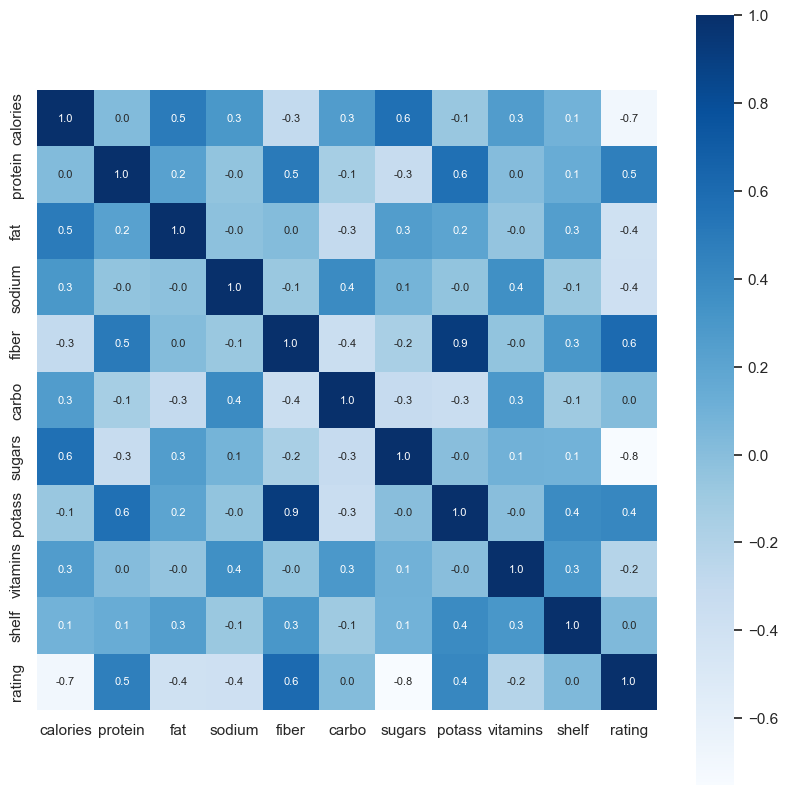

In [206]:
# Correlation
# Constructing a Heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

สำหรับการทำ appropriate attribute selection ผมจะใช้เทคนิคทางด้านการดู correlation โดยจะเน้นที่ feature ที่มี positive correlation กับ rating ครับ เพราะนั้นหมายความว่ายิ่ง feature พวกนี้มีค่ามาก เราก็จะสามารถได้ rating ที่สูงมากขึ้นเช่นเดียวกันครับ
จาก Heatmap จะพบว่า attribute ที่มีความเป็น positive correlation กับ rating มีดั่งนี้
- 1) protein โดยจะมี positive correlation ที่ 0.5
- 2) fiber โดยจะมี positive correlation ที่ 0.6
- 3) potass โดยจะมี positive correlation ที่ 0.4

โดย protein และ fiber จะมีความเป็น Moderate and association positive correlation กับ rating ครับ
และ potass จะมีความเป็น weak and association positive correlation ครับ

ดังนั้นแล้วสำหรับการทำข้อ 
- a) Apply K-Mean algorithm with best K
- b) Explain the meaning of each cluster by going their description

ผมจะเลือก feature: fiber เพราะมันมีความเป็น Moderate and association positive correlation สูงสุดกับ rating ครับ

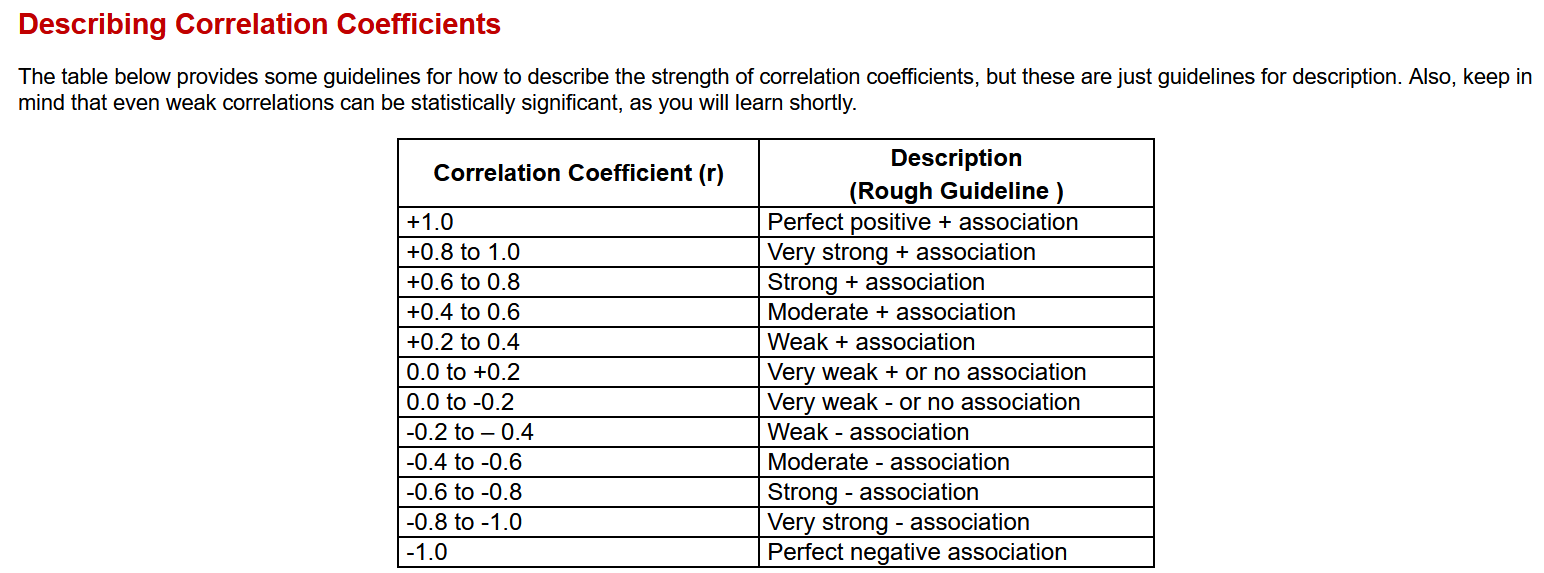

### Choosing feature fiber

Text(0, 0.5, 'Rating')

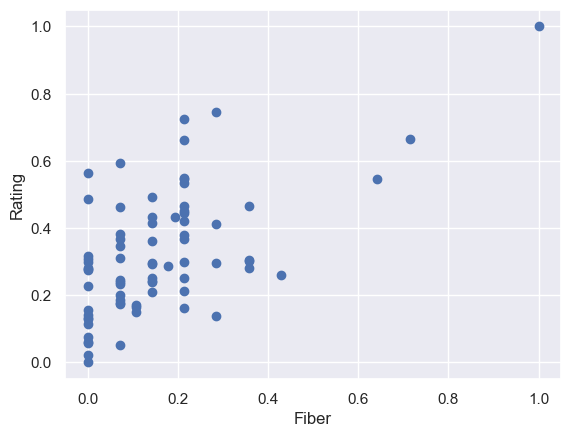

In [207]:
plt.scatter(df_scaled.fiber, df_scaled['rating'])
plt.xlabel('Fiber')
plt.ylabel('Rating')

### a) Apply K-Mean algorithm with best K

In [208]:
# Elbow Plot Method
from sklearn.cluster import KMeans

WCSS = []
K_range = range(2,11)
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled[['fiber', 'rating']])
    WCSS.append(km.inertia_)

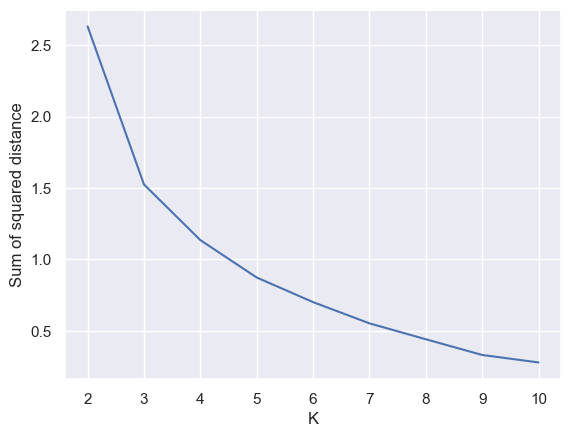

In [209]:
sns.set()
plt.xlabel('K')
plt.ylabel('Sum of squared distance')
plt.plot(K_range, WCSS)
plt.show()

# จากรูปจะพบว่า Optimum Number of Clusters = 3 or 4
# Reference: https://medium.com/swlh/how-to-choose-the-right-number-of-clusters-in-the-k-means-algorithm-9160c57ec760

In [210]:
km = KMeans(n_clusters=3, init = 'k-means++', random_state=69) # or n_clusters=4
Y_predicted = km.fit_predict(df_scaled[['fiber', 'rating']])
Y_predicted

#About k-means++:
#Drawback of standard K-means algorithm:

#One disadvantage of the K-means algorithm is that it 
#is sensitive to the initialization of the centroids or the mean points. 
#So, if a centroid is initialized to be a “far-off” point, 
#it might just end up with no points associated with it, and at the same time, 
#more than one cluster might end up linked with a single centroid. 
#Similarly, more than one centroid might be initialized into the same cluster resulting in poor clustering. 
#A poor initialization of centroids resulted in poor clustering.  

#To overcome the above-mentioned drawback we use K-means++. 
#This algorithm ensures a smarter initialization of the centroids and improves the quality of the clustering. 
#Apart from initialization, the rest of the algorithm is the same as the standard K-means algorithm. 
#That is K-means++ is the standard K-means algorithm coupled with a smarter initialization of the centroids.

array([2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1])

In [211]:
df_scaled['cluster'] = Y_predicted
df_scaled.head()

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating,cluster
0,100%_Bran,0.181818,0.6,0.2,0.406250,0.714286,0.250000,0.4375,0.841270,0.25,1.0,0.665593,2
1,100%_Natural_Bran,0.636364,0.4,1.0,0.046875,0.142857,0.375000,0.5625,0.380952,0.00,1.0,0.210685,1
2,All-Bran,0.181818,0.6,0.2,0.812500,0.642857,0.333333,0.3750,0.968254,0.25,1.0,0.546941,2
3,All-Bran_with_Extra_Fiber,0.000000,0.6,0.0,0.437500,1.000000,0.375000,0.0625,1.000000,0.25,1.0,1.000000,2
5,Apple_Cinnamon_Cheerios,0.545455,0.2,0.4,0.562500,0.107143,0.479167,0.6875,0.174603,0.25,0.0,0.151551,1


In [212]:
km.cluster_centers_

array([[0.20437788, 0.44838991],
       [0.07317073, 0.19793169],
       [0.78571429, 0.73751113]])

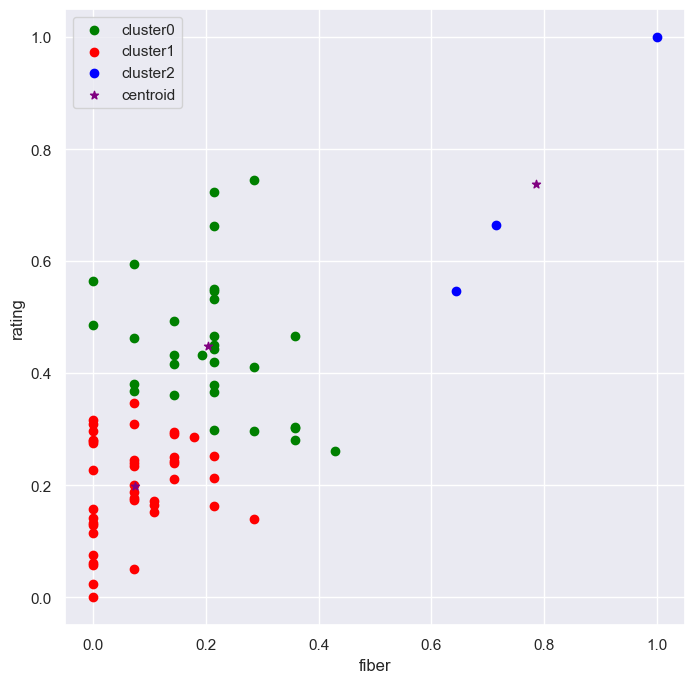

In [213]:
df1=df_scaled[df_scaled.cluster==0]
df2=df_scaled[df_scaled.cluster==1]
df3=df_scaled[df_scaled.cluster==2]
#df4=df_scaled[df_scaled.cluster==3]

plt.figure(figsize=(8,8))
plt.scatter(df1.fiber, df1['rating'], color='green', label='cluster0')
plt.scatter(df2.fiber, df2['rating'], color='red', label='cluster1')
plt.scatter(df3.fiber, df3['rating'], color='blue', label='cluster2')
#plt.scatter(df4.fiber, df4['rating'], color='black', label='cluster3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('fiber')
plt.ylabel('rating')
plt.legend()

### b) Explain the meaning of each cluster by going their description.

In [214]:
df_scaled[["fiber","rating","cluster"]].groupby('cluster').describe().T.head(20)

cluster               0          1         2
fiber  count  31.000000  41.000000  3.000000
       mean    0.204378   0.073171  0.785714
       std     0.105538   0.077407  0.188982
       min     0.000000   0.000000  0.642857
       25%     0.142857   0.000000  0.678571
       50%     0.214286   0.071429  0.714286
       75%     0.250000   0.142857  0.857143
       max     0.428571   0.285714  1.000000
rating count  31.000000  41.000000  3.000000
       mean    0.448390   0.197932  0.737511
       std     0.124012   0.087714  0.234936
       min     0.261660   0.000000  0.546941
       25%     0.367353   0.141413  0.606267
       50%     0.433315   0.210685  0.665593
       75%     0.512758   0.274866  0.832796
       max     0.745818   0.347440  1.000000

<AxesSubplot:xlabel='cluster', ylabel='count'>

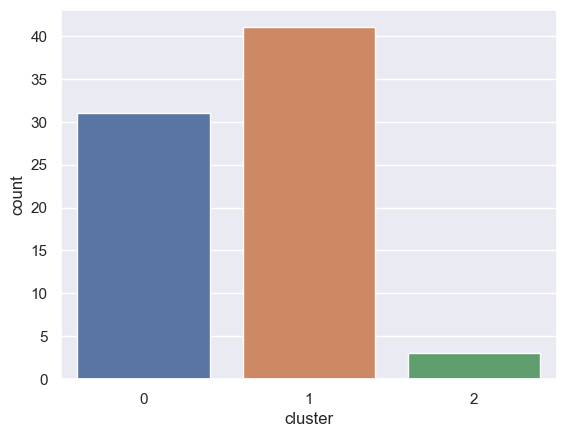

In [215]:
sns.countplot(x='cluster', data=df_scaled)

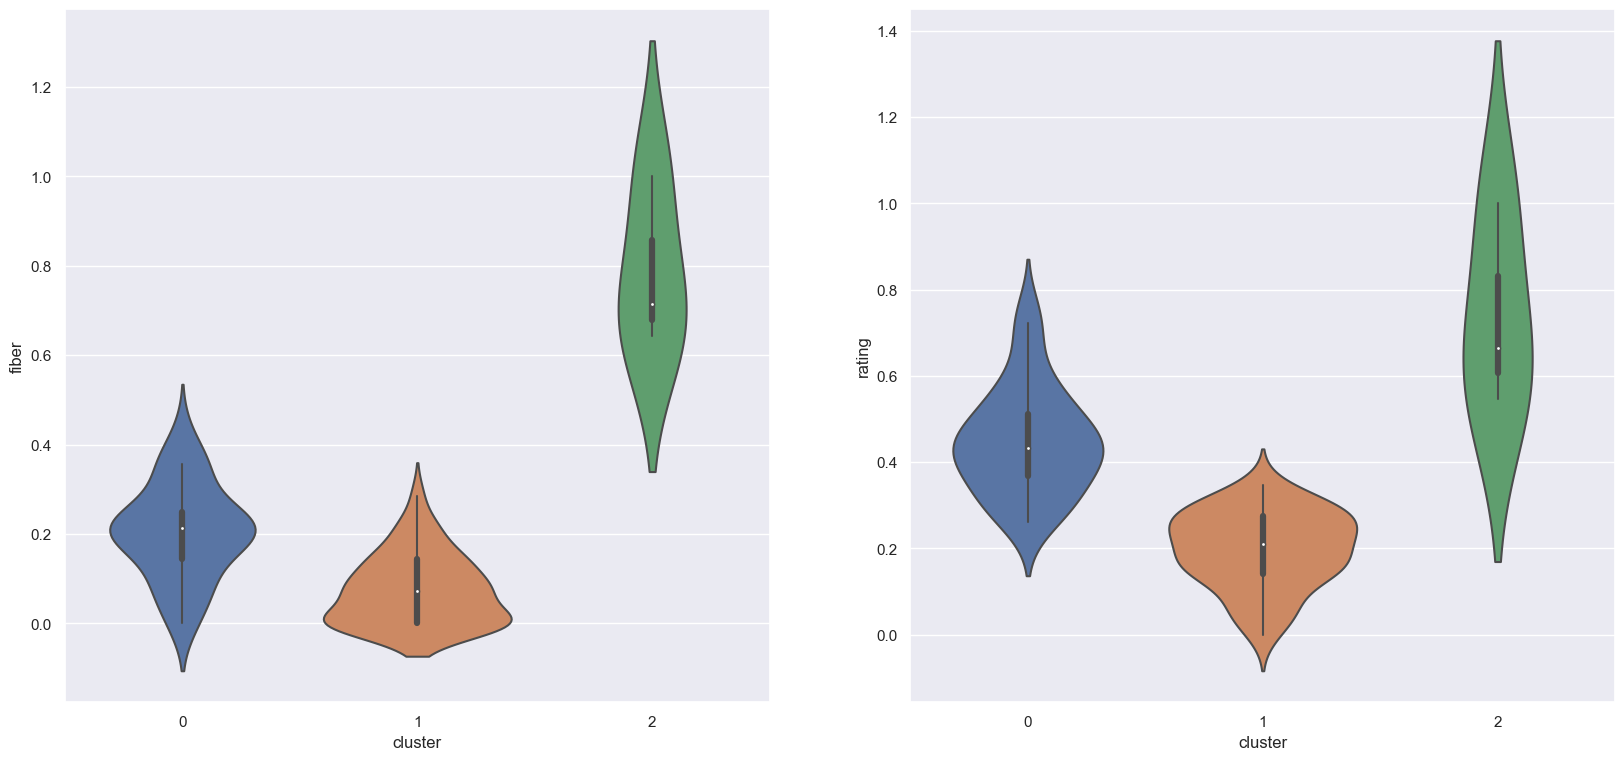

In [216]:
# Scaled Dataset
cols=['fiber','rating']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=df_scaled, ax=ax[i])

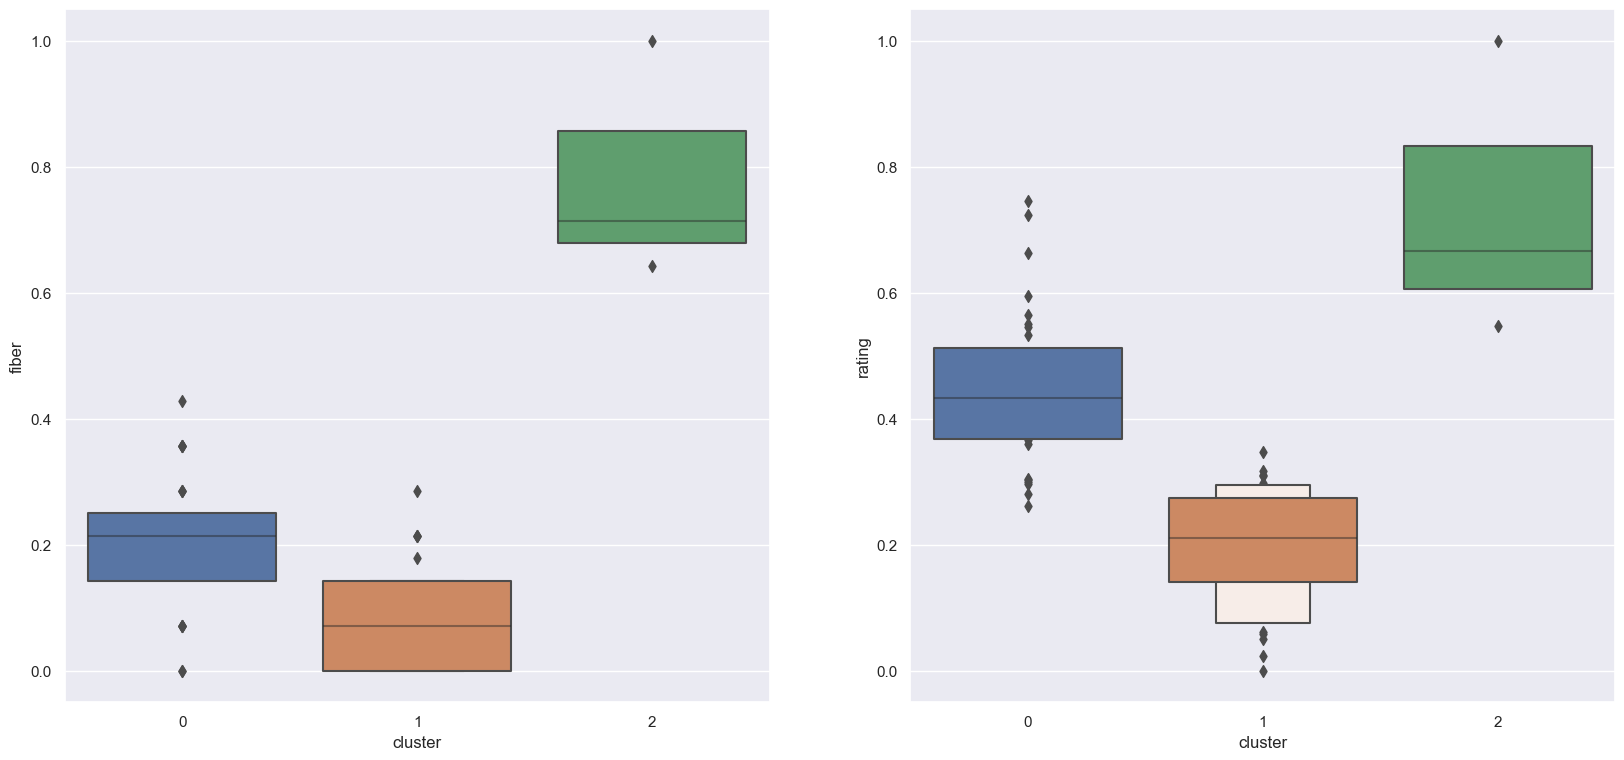

In [217]:
# Scaled Dataset
cols=['fiber','rating']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.boxenplot(x='cluster', y=col, data=df_scaled, ax=ax[i])

### c) The elementary public schools would like to choose a set of cereals to include in their daily cafeterias. Every day a different cereal is offered, but all cereals should support a healthy diet. For this goal you are requested to find a cluster of "healthy cereals"

In [218]:
df.head(5)

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6,280.0,25,3,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8,135.0,0,3,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5,320.0,25,3,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0,330.0,25,3,93.704912
5,Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10,70.0,25,1,29.509541


Nutrition facts for a healthy cereal should include a balance of essential nutrients while being low in added sugars and unhealthy fats. Here are some key nutrition facts to consider when choosing a cereal for a healthy diet:

- Calories: A healthy cereal should provide an appropriate number of calories to fit within your daily calorie needs, typically around 150-250 calories per serving.

- Fiber: Look for cereals with a high fiber content, ideally 3 grams or more per serving. Fiber is essential for digestive health and can help you feel full longer.

- Protein: A good cereal choice should have some protein content, which can help with satiety. Aim for at least 3-5 grams of protein per serving.

- Whole Grains: Opt for cereals made from whole grains, as they provide more nutrients and fiber compared to refined grains. Check the ingredient list for words like "whole wheat," "whole oats," or "whole grain."

- Sugar: Keep an eye on the sugar content. Healthy cereals should be low in added sugars, ideally less than 5 grams per serving. Avoid cereals with sugary coatings.

- Fat: Choose cereals that are low in unhealthy saturated and trans fats. Look for cereals with minimal added fats and oils.

- Sodium: Check the sodium (salt) content and aim for cereals that are lower in salt. High-sodium cereals can contribute to high blood pressure.

- Vitamins and Minerals: Healthy cereals often contain essential vitamins and minerals, such as vitamin D, calcium, and iron. These nutrients are important for overall health.

- Carbohydrates: Carbohydrates are an essential source of energy, and they are a significant component of cereals. For healthy cereals, it's often recommended to choose cereals that provide complex carbohydrates, such as whole grains, rather than cereals with refined carbohydrates. A good range for carbohydrates in healthy cereals could be around 20-40 grams of carbohydrates per serving, but this can vary depending on individual dietary goals and calorie needs.

- Potassium: Potassium is an essential mineral that plays a role in heart health, muscle function, and maintaining proper hydration. A good range for potassium in healthy cereals could be around 200-400 milligrams per serving. Keep in mind that the recommended daily intake of potassium for adults is around 2,500-3,000 milligrams, so cereals should be just one source of potassium in your overall diet.

- No Artificial Additives: Consider cereals that do not contain artificial flavors, colors, or preservatives.

- Portion Size: Pay attention to the recommended serving size on the nutrition label and stick to it. Larger portions can lead to overconsumption of calories and other nutrients.

When shopping for cereal, it's essential to read the nutrition labels and ingredient lists carefully to make an informed choice. Additionally, consider your individual dietary needs and preferences, such as any dietary restrictions or allergies you may have, when selecting a healthy cereal.

in summary:
- High Fiber: >= 3 grams
- High Protein: >= 3-5 grams
- High vitamins
 
- Calories: 150-250 
- Carbo 20-40 grams
- Potassium 200-400 mg

- Low Sugar: < 5 grams
- Low Fat
- Low Sodium

high: fiber, vitamin, protein

medium: calories, carbo, potassium

low: fat, sodium, sugar

In [219]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled2 = df.copy()

for _ in Numerical_Columns:
    df_scaled2[_] = scaler.fit_transform(df_scaled2[[_]])

In [220]:
# Elbow Plot Method
from sklearn.cluster import KMeans

WCSS = []
K_range = range(2,15)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=69)
    km.fit(df_scaled2[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']])
    WCSS.append(km.inertia_)

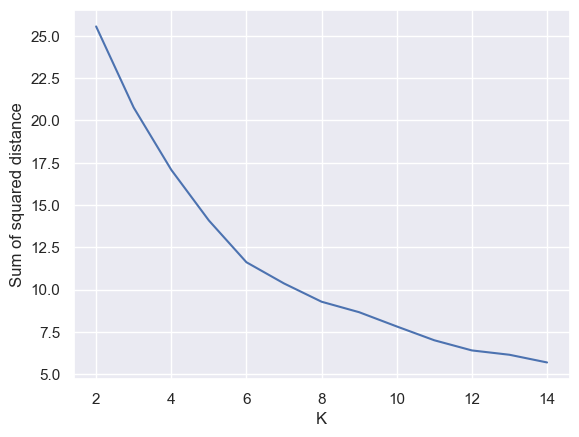

In [221]:
sns.set()
plt.xlabel('K')
plt.ylabel('Sum of squared distance')
plt.plot(K_range, WCSS)
plt.show()

# จากรูปจะพบว่า Optimum Number of Clusters = 6
# Reference: https://medium.com/swlh/how-to-choose-the-right-number-of-clusters-in-the-k-means-algorithm-9160c57ec760

In [222]:
km = KMeans(n_clusters=6, init = 'k-means++', random_state=69)
Y_predicted2 = km.fit_predict(df_scaled2[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']])
Y_predicted2

array([5, 0, 5, 5, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1,
       2, 2, 3, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 4, 4, 1, 0, 2, 3, 0, 0,
       0, 1, 2, 0, 1, 0, 0, 4, 3, 3, 0, 3, 0, 0, 3, 1, 1, 3, 3, 3, 2, 1,
       3, 4, 4, 4, 1, 2, 1, 1, 2])

In [223]:
df_scaled2['cluster'] = Y_predicted2
df_scaled2.head()

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating,cluster
0,100%_Bran,0.181818,0.6,0.2,0.406250,0.714286,0.250000,0.4375,0.841270,0.25,1.0,0.665593,5
1,100%_Natural_Bran,0.636364,0.4,1.0,0.046875,0.142857,0.375000,0.5625,0.380952,0.00,1.0,0.210685,0
2,All-Bran,0.181818,0.6,0.2,0.812500,0.642857,0.333333,0.3750,0.968254,0.25,1.0,0.546941,5
3,All-Bran_with_Extra_Fiber,0.000000,0.6,0.0,0.437500,1.000000,0.375000,0.0625,1.000000,0.25,1.0,1.000000,5
5,Apple_Cinnamon_Cheerios,0.545455,0.2,0.4,0.562500,0.107143,0.479167,0.6875,0.174603,0.25,0.0,0.151551,2


In [224]:
km.cluster_centers_

array([[0.6684492 , 0.44705882, 0.42352941, 0.47794118, 0.22689076,
        0.6127451 , 0.62867647, 0.43510738, 0.23529412],
       [0.48484848, 0.34444444, 0.1       , 0.70833333, 0.12698413,
        0.80324074, 0.27430556, 0.19753086, 0.25      ],
       [0.55411255, 0.1047619 , 0.2       , 0.52678571, 0.04081633,
        0.55952381, 0.7797619 , 0.10279667, 0.25      ],
       [0.30909091, 0.34      , 0.06      , 0.0046875 , 0.155     ,
        0.6125    , 0.1875    , 0.24603175, 0.1       ],
       [0.60606061, 0.33333333, 0.16666667, 0.65104167, 0.13095238,
        0.79861111, 0.45833333, 0.25661376, 1.        ],
       [0.12121212, 0.6       , 0.13333333, 0.55208333, 0.78571429,
        0.31944444, 0.29166667, 0.93650794, 0.25      ]])

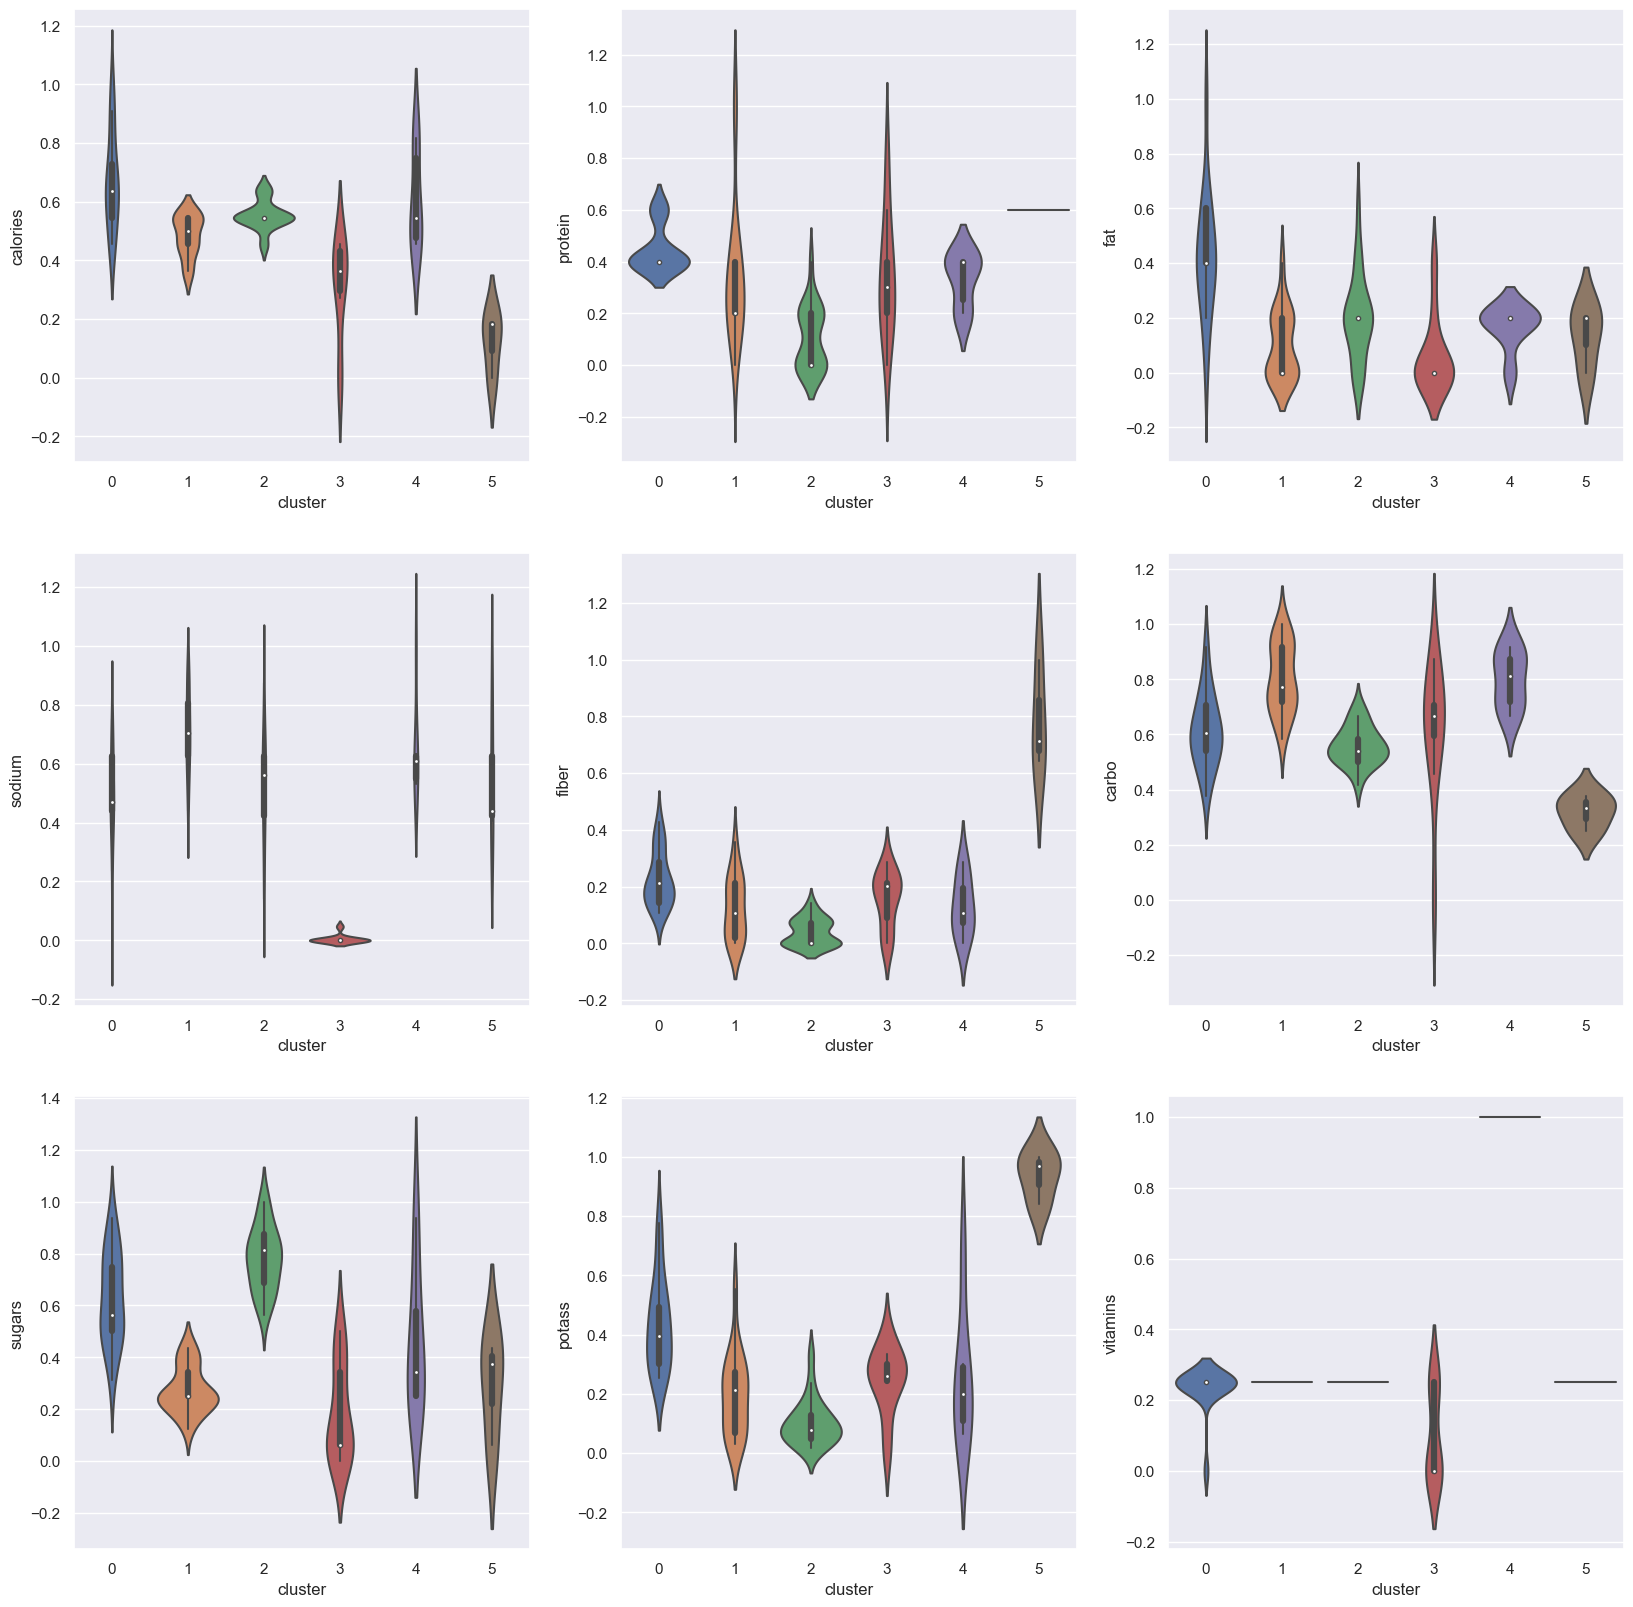

In [225]:
# Scaled Data
cols=['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=df_scaled2, ax=ax[i])

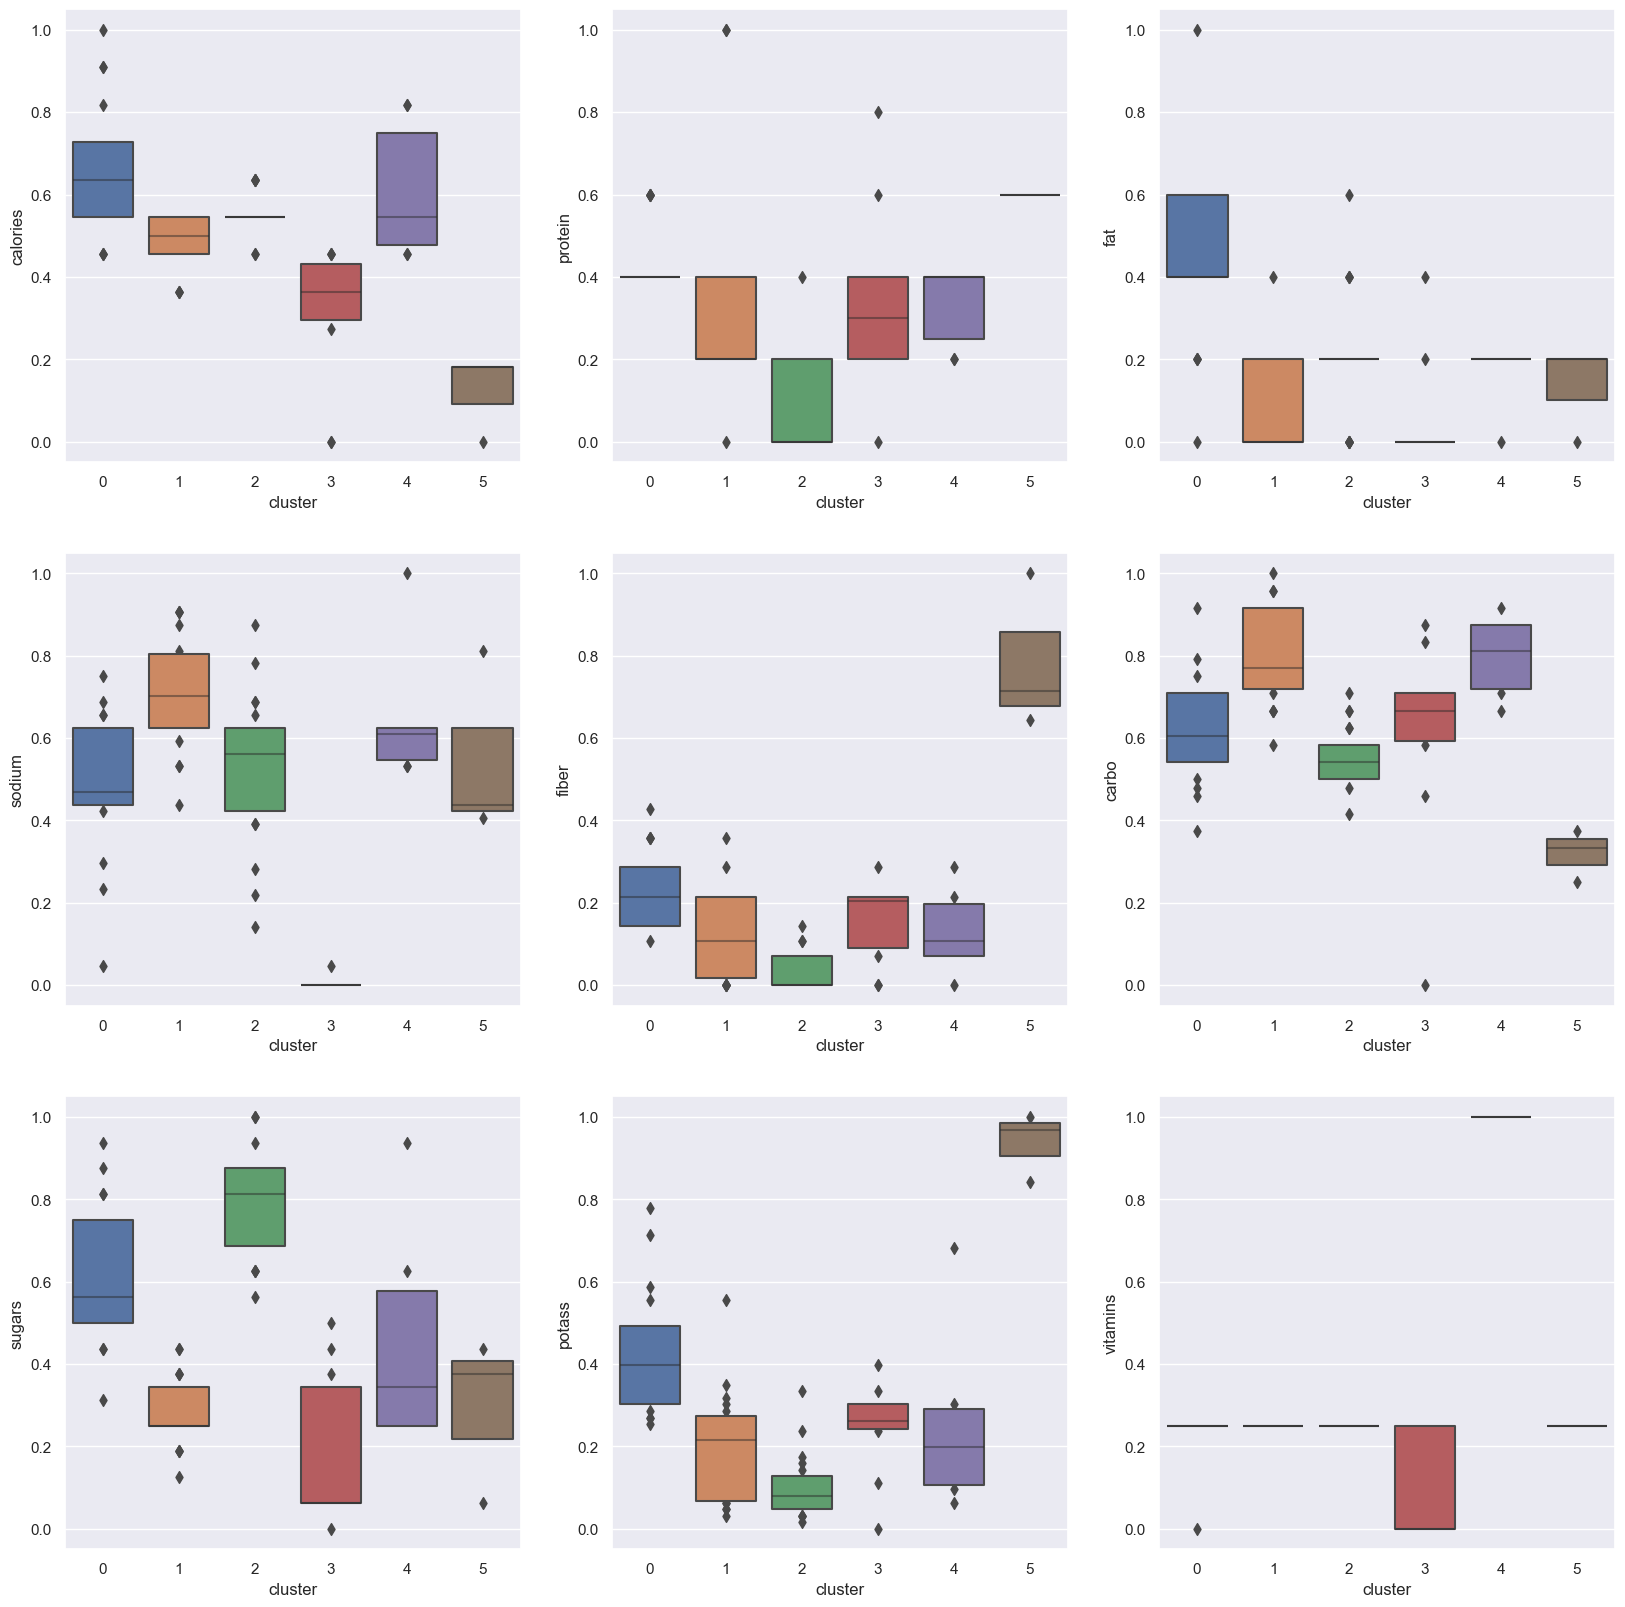

In [226]:
# Scaled Data
cols=['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.boxenplot(x='cluster', y=col, data=df_scaled2, ax=ax[i])

In [227]:
# THE END